In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("titanic_train.csv")

1:survived

0:dead

In [3]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex,Title,Q,S
0,0,1,0.0,3,22.0,1,0,A/5 21171,7.2500,1,0,0,1
1,1,2,1.0,1,38.0,1,0,PC 17599,71.2833,0,2,0,0
2,2,3,1.0,3,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,1
3,3,4,1.0,1,35.0,1,0,113803,53.1000,0,2,0,1
4,4,5,0.0,3,35.0,0,0,373450,8.0500,1,0,0,1


In [4]:
from sklearn.linear_model import LogisticRegression

titanic_log_reg = LogisticRegression() 

In [5]:
X = df.drop(["Survived","Ticket"],axis = 1)
y = df["Survived"]

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

titanic_log_reg.fit(X_train,y_train)

train_score = titanic_log_reg.score(X_train,y_train)
test_score = titanic_log_reg.score(X_test,y_test)

print("eğitim veri kümesi doğruluk: ",train_score)
print("test veri kümesi doğruluk: ",test_score)


eğitim veri kümesi doğruluk:  0.8103932584269663
test veri kümesi doğruluk:  0.8156424581005587


In [7]:
train_predict = titanic_log_reg.predict(X_train)
test_predict = titanic_log_reg.predict(X_test)
test_predict_proba = titanic_log_reg.predict_proba(X_test)[:,1]

## Değerlendirme metrikleri

### 1.Hata Matrisi(Confusion Matrix)

In [8]:
from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_train,train_predict)
test_confusion_matrix= confusion_matrix(y_test,test_predict)

print("eğitim veri kümesi hata matrisi: ",train_confusion_matrix ,"*"*30,
      
      "test veri kümesi hata matrisi: ",test_confusion_matrix ,sep="\n" )



eğitim veri kümesi hata matrisi: 
[[381  64]
 [ 71 196]]
******************************
test veri kümesi hata matrisi: 
[[91 13]
 [20 55]]


test confusion matris acıklaması: 

Gercekte 104 kişi ölmüş olup TN:91'i ölü olarak tahmin edilmiş ve FP:13'ü hayatta kaldı olarak tahmin edilmiştir.

Gercekte 75 kişi hayatta kalmıs olup FN:20'si ölü olarak tahmin edilmiş ve TP:55'i hayatta kaldı olarak tahmin edilmiştir.

In [9]:
TN = test_confusion_matrix[0][0]
TP = test_confusion_matrix[1][1]
FP = test_confusion_matrix[0][1]
FN = test_confusion_matrix[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 91
Doğru pozitif sayısı   : 55
Yanlış pozitif sayısı  : 13
Yanlış negatif sayısı  : 20


### Hata Matrisi Metrikleri

#### 1.1.Doğruluk(Accuracy)

Doğru olarak sınıflandırılanların toplam sayıya oranıdır.

In [10]:
from sklearn.metrics import accuracy_score

print("test veri kümesinin doğruluğu: ", titanic_log_reg.score(X_test,y_test))
print("Hesaplanan doğruluk değeri: ",(TP+TN)/(TP+TN+FP+FN))
print("accuracy_score: ",accuracy_score(y_test,test_predict))

test veri kümesinin doğruluğu:  0.8156424581005587
Hesaplanan doğruluk değeri:  0.8156424581005587
accuracy_score:  0.8156424581005587


#### 1.2.Hata Oranı(Error Rate)

Yanlış olarak sınıflandırılanların toplam sayıya oranıdır.

In [11]:
print("hata oranı: ",(FP+FN)/(TN+TP+FN+FP))
print("hata oranı: ",1-accuracy_score(y_test,test_predict))

hata oranı:  0.18435754189944134
hata oranı:  0.1843575418994413


#### 1.3.Hassasiyet (Precision)

Pozitif olarak tahmin edilenlerin gerçekte ne kadarının pozitif olduğunu gösterir.Hayatta kaldığı tahmin edilen yolcuların %80'i gercekten hayatta kalmıstır.

In [12]:
from sklearn.metrics import precision_score

print("Hassasiyet oranı: ",precision_score(y_test,test_predict))
print("precision_score degeri: ",TP/(TP+FP))

Hassasiyet oranı:  0.8088235294117647
precision_score degeri:  0.8088235294117647


#### 1.4.Duyarlılık(Recall)

Gerçekten pozitif olanların ne kadarının pozitif olduğunu gösterir.Gercekte hayatta kalan yolcuların %73'ü hayatta kaldı olarak tahmin edilmiştir.

In [13]:
from sklearn.metrics import recall_score

print("Duyarlılık oranı: ",recall_score(y_test,test_predict))
print("recall_score degeri: ",TP/(TP+FN))

Duyarlılık oranı:  0.7333333333333333
recall_score degeri:  0.7333333333333333


#### 1.5.Özgünlük

Gerçekte negatif olanların ne kadar basarılı tahmin edildiğidir.Gercekte ölen yolcuların %87.5'i öldü olarak tahmin edilmiştir.

In [14]:
print("Özgünlük değeri: ",TN/(TN+FP))

Özgünlük değeri:  0.875


#### 1.6.F1 score

In [15]:
from sklearn.metrics import f1_score

print("f1_score degeri: ",f1_score(y_test,test_predict))

f1_score degeri:  0.7692307692307693


### 2.ROC Eğrisi(ROC/AUC)

AUC değeri:  0.8598717948717949


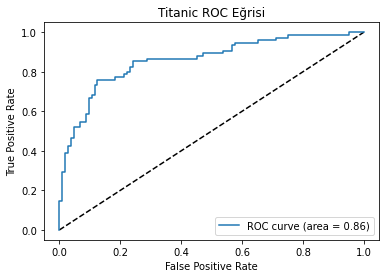

In [16]:
from sklearn.metrics import roc_curve,roc_auc_score

auc_area = roc_auc_score(y_test,test_predict_proba)
print("AUC değeri: ",roc_auc_score(y_test,test_predict_proba))

fpr,tpr,threshold = roc_curve(y_test,test_predict_proba)

import matplotlib.pyplot as plt

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_area)
plt.title("Titanic ROC Eğrisi")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 3.Hassasiyet/Duyarlılık Eğrisi

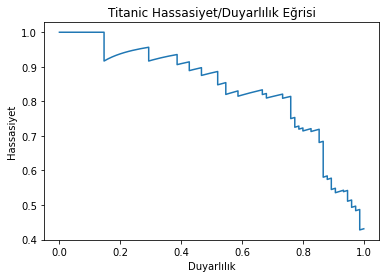

In [17]:
from sklearn.metrics import precision_recall_curve

hassasiyet,duyarlılık,_ = precision_recall_curve(y_test,test_predict_proba)

plt.plot(duyarlılık,hassasiyet)
plt.title("Titanic Hassasiyet/Duyarlılık Eğrisi")
plt.xlabel("Duyarlılık")
plt.ylabel("Hassasiyet")
plt.show()

### 4.Logaritmik Kayıp

In [18]:
from sklearn.metrics import log_loss

print("Logaritmik kayıp değeri: ",log_loss(y_test,test_predict_proba))

Logaritmik kayıp değeri:  0.4494611836034657


### Farklı C değerleri için ROC ve Hassasiyet/Duyarlılık eğrileri

#### C = 0.1 için:

In [19]:
log_reg = LogisticRegression(C=0.1)

log_reg.fit(X_train,y_train)
print("train set score: ",log_reg.score(X_train,y_train))
print("test set score: ",log_reg.score(X_test,y_test))

train set score:  0.8132022471910112
test set score:  0.8156424581005587


In [20]:
train_predict = log_reg.predict(X_train)
test_predict = log_reg.predict(X_test)
test_predict_proba = log_reg.predict_proba(X_test)[:,1]


auc_area:  0.8607692307692308


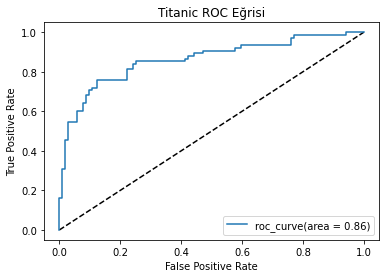

In [21]:
#ROC eğrisi

auc_area = roc_auc_score(y_test,test_predict_proba)
print("auc_area: ",auc_area)
ftr,ptr,threshold = roc_curve(y_test,test_predict_proba)

plt.plot([0,1],[0,1],"k--")
plt.plot(ftr,ptr,label="roc_curve(area = %0.2f)" % auc_area)
plt.title("Titanic ROC Eğrisi")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

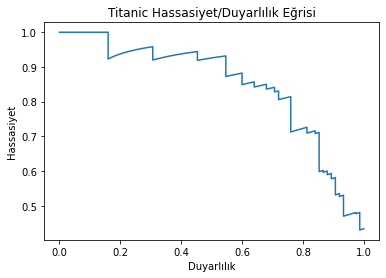

In [22]:
# Hassasiyet/Duyarlılık Eğrisi

hassasiyet,duyarlılık,_ = precision_recall_curve(y_test,test_predict_proba)
plt.plot(duyarlılık,hassasiyet)
plt.title("Titanic Hassasiyet/Duyarlılık Eğrisi")
plt.xlabel("Duyarlılık")
plt.ylabel("Hassasiyet")
plt.show()

#### C=0.01 için:

In [23]:
log_reg = LogisticRegression(C=0.01)

log_reg.fit(X_train,y_train)
print("train set score: ",log_reg.score(X_train,y_train))
print("test set score: ",log_reg.score(X_test,y_test))

train_predict = log_reg.predict(X_train)
test_predict = log_reg.predict(X_test)
test_predict_proba = log_reg.predict_proba(X_test)[:,1]


train set score:  0.7752808988764045
test set score:  0.7821229050279329


auc_area:  0.8458974358974359


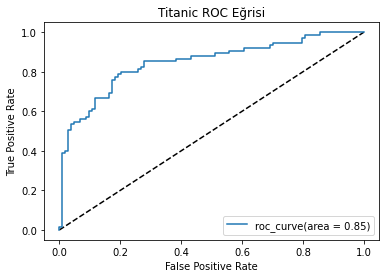

In [24]:
#ROC eğrisi

auc_area = roc_auc_score(y_test,test_predict_proba)
print("auc_area: ",auc_area)
ftr,ptr,threshold = roc_curve(y_test,test_predict_proba)

plt.plot([0,1],[0,1],"k--")
plt.plot(ftr,ptr,label="roc_curve(area = %0.2f)" % auc_area)
plt.title("Titanic ROC Eğrisi")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

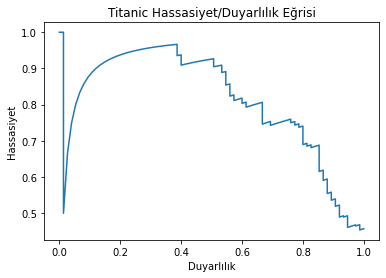

In [25]:
# Hassasiyet/Duyarlılık Eğrisi

hassasiyet,duyarlılık,_ = precision_recall_curve(y_test,test_predict_proba)
plt.plot(duyarlılık,hassasiyet)
plt.title("Titanic Hassasiyet/Duyarlılık Eğrisi")
plt.xlabel("Duyarlılık")
plt.ylabel("Hassasiyet")
plt.show()

#### C=10 için:

In [26]:
log_reg = LogisticRegression(C=10)

log_reg.fit(X_train,y_train)
print("train set score: ",log_reg.score(X_train,y_train))
print("test set score: ",log_reg.score(X_test,y_test))

train_predict = log_reg.predict(X_train)
test_predict = log_reg.predict(X_test)
test_predict_proba = log_reg.predict_proba(X_test)[:,1]


train set score:  0.8075842696629213
test set score:  0.8156424581005587


auc_area:  0.854871794871795


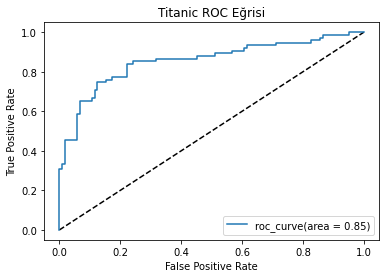

In [27]:
#ROC eğrisi

auc_area = roc_auc_score(y_test,test_predict_proba)
print("auc_area: ",auc_area)
ftr,ptr,threshold = roc_curve(y_test,test_predict_proba)

plt.plot([0,1],[0,1],"k--")
plt.plot(ftr,ptr,label="roc_curve(area = %0.2f)" % auc_area)
plt.title("Titanic ROC Eğrisi")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

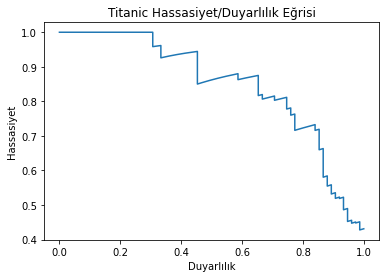

In [28]:
# Hassasiyet/Duyarlılık Eğrisi

hassasiyet,duyarlılık,_ = precision_recall_curve(y_test,test_predict_proba)
plt.plot(duyarlılık,hassasiyet)
plt.title("Titanic Hassasiyet/Duyarlılık Eğrisi")
plt.xlabel("Duyarlılık")
plt.ylabel("Hassasiyet")
plt.show()

In [29]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_train, y_train),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)  

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.692416,0.648045
1,0.010,0.775281,0.782123
2,0.100,0.813202,0.815642
3,1.000,0.810393,0.815642
4,10.000,0.807584,0.815642
5,100.000,0.807584,0.815642
6,1000.000,0.807584,0.815642


Farklı C değerleri için çizilen ROC Eğrileri, Hassasiyet/Duyarlılık Eğrileri, Eğitim Doğruluğu ve Test Doğruluğu incelendiğinde C=1 en ideal değerdir.